In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Preprocessing the dataset

In [9]:
# check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# fill the missing values
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Exploratory Data Analysis

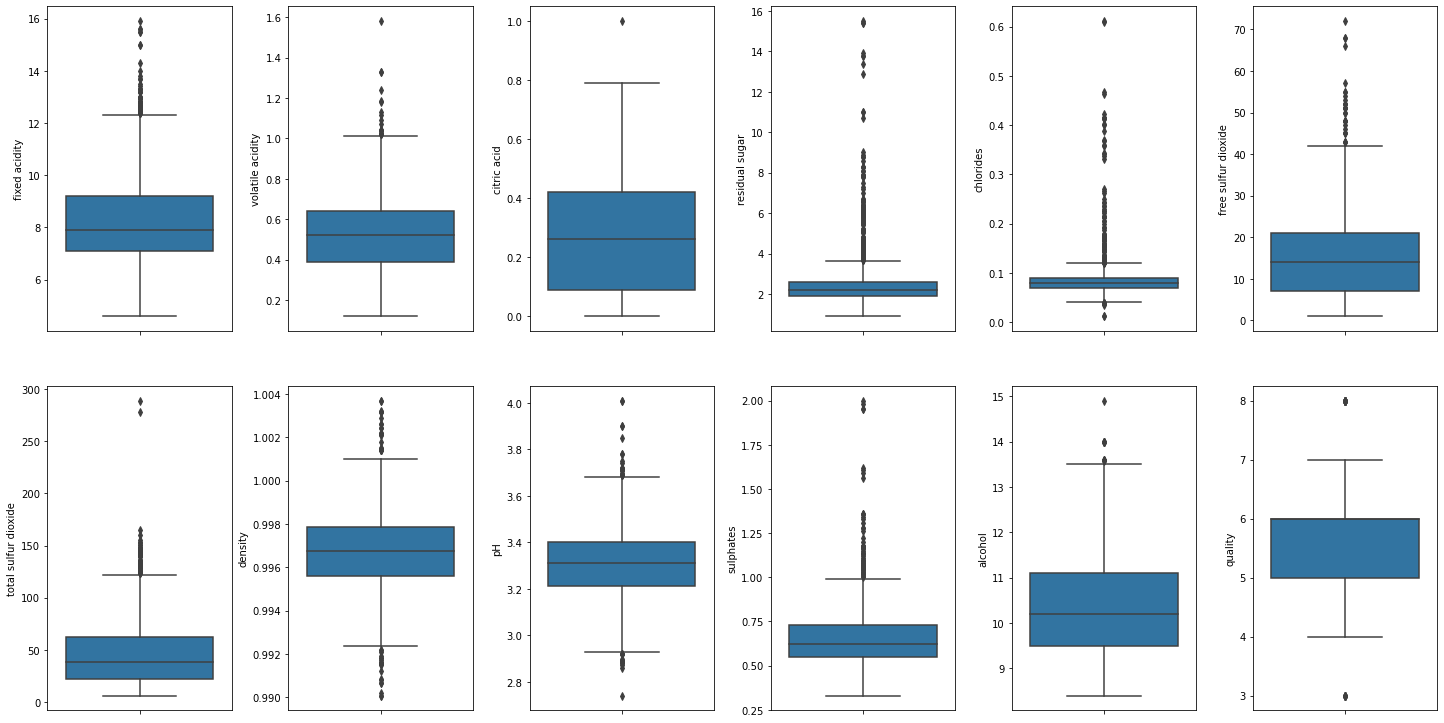

In [12]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

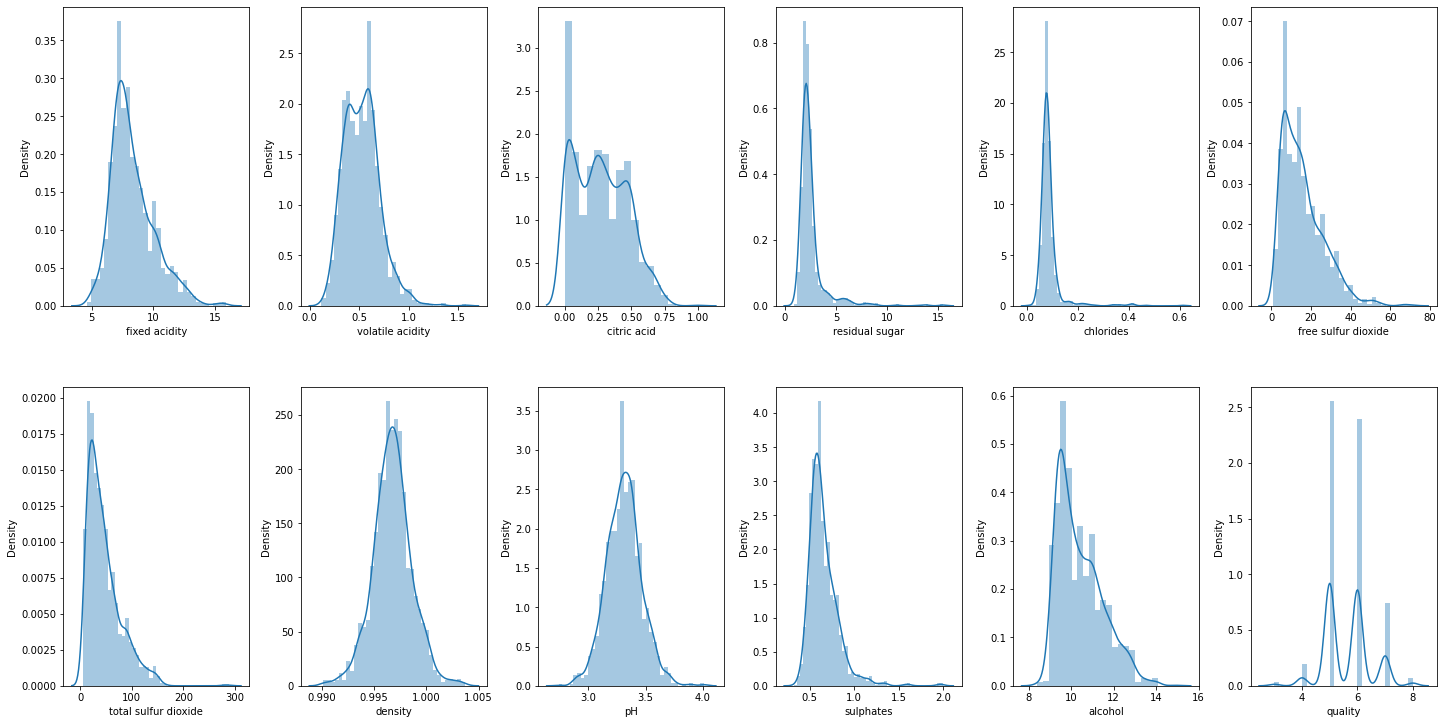

In [13]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [14]:
# log transformation for using scaling the features
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])
df['total sulfur dioxide'] = np.log(1 + df['total sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

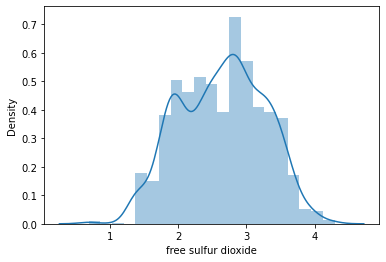

In [15]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='fixed acidity', ylabel='count'>

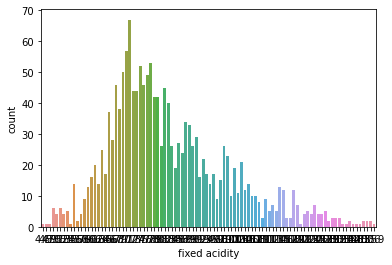

In [17]:
sns.countplot(df['fixed acidity'])

<AxesSubplot:xlabel='quality', ylabel='count'>

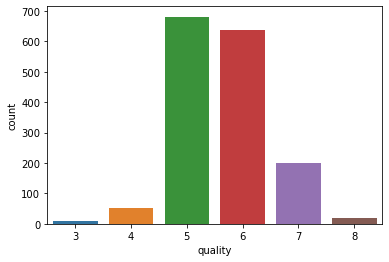

In [18]:
# quality of the wine ranges
sns.countplot(df['quality'])

Coorelation Matrix

<AxesSubplot:>

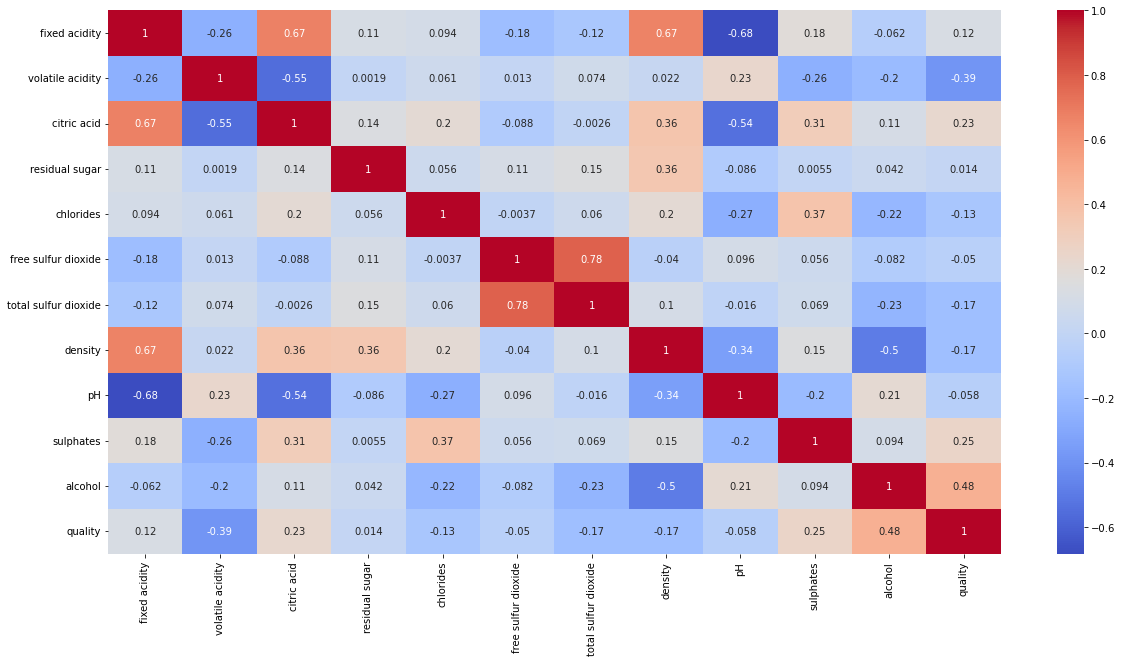

In [19]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Input Split

In [21]:
X = df.drop(columns=['fixed acidity', 'quality'])
y = df['quality']

Class Imbalancement

In [23]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [24]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [25]:
y.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

Model Training

In [27]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 50.09784735812133
CV Score: 50.36701750395777


In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy: 77.29941291585128
CV Score: 75.33070180426333


In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 85.81213307240705
CV Score: 82.40288131484678


In [31]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy: 86.88845401174167
CV Score: 83.43073382552303


In [32]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model, X, y)

Accuracy: 77.49510763209393
CV Score: 74.96308577208643


In [33]:
from sklearn.svm import SVC
model = SVC()
classify(model, X, y)

Accuracy: 47.064579256360076
CV Score: 48.11532441725796


In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classify(model, X, y)

Accuracy: 48.336594911937375
CV Score: 47.74839669253306


Best Model Extra tree classifier

In [35]:
 x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
prediction = model.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report

clf = classification_report(y_test,prediction)
print(clf)

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       165
           4       0.89      0.99      0.93       165
           5       0.75      0.75      0.75       185
           6       0.77      0.60      0.67       193
           7       0.84      0.97      0.90       147
           8       0.99      1.00      1.00       167

    accuracy                           0.87      1022
   macro avg       0.87      0.88      0.87      1022
weighted avg       0.87      0.87      0.87      1022



[[165   0   0   0   0   0]
 [  0 163   2   0   0   0]
 [  2  12 138  30   3   0]
 [  0   9  44 115  24   1]
 [  0   0   1   4 142   0]
 [  0   0   0   0   0 167]]


<AxesSubplot:>

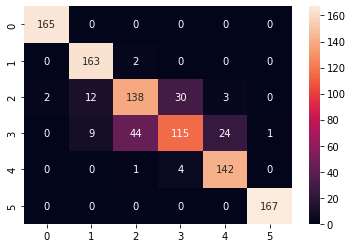

In [39]:
cm = confusion_matrix(y_test,prediction)
print(cm)
sns.heatmap(cm,annot=True,fmt='.4g',)